## Introdução

**Iniciaremos a Análise nos familiarizando com a planilha apresentada, ela contém, 48 registros.**  

**Ela possui 48 registros que nos apresentaram insights sobre as seguintes variáveis: Grupo, Gravidade, Sexo, Idade, Peso, Altura, IMC, Eventos, % eventos, Resultado teste A, Frequência e Intensidade.**



In [55]:
import subprocess

def export_notebook_to_pdf(notebook_path, output_path=None):
    
    if output_path is None:
        output_path = notebook_path.replace('.ipynb', '.pdf')

    try:
        subprocess.run([
            'jupyter', 'nbconvert',
            '--to', 'webpdf',
            '--output', output_path,
            notebook_path
        ], check=True)
        print(f"Notebook exportado com sucesso para {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Erro ao exportar o notebook: {e}")

# 
notebook_path = r"C:\Users\lost4\OneDrive\Documentos\DATA\job related\CONSULTORIA\Análise_Clínica_KarineDJUSTINO.ipynb"


export_notebook_to_pdf(notebook_path)

Erro ao exportar o notebook: Command '['jupyter', 'nbconvert', '--to', 'webpdf', '--output', 'C:\\Users\\lost4\\OneDrive\\Documentos\\DATA\\job related\\CONSULTORIA\\Análise_Clínica_KarineDJUSTINO.pdf', 'C:\\Users\\lost4\\OneDrive\\Documentos\\DATA\\job related\\CONSULTORIA\\Análise_Clínica_KarineDJUSTINO.ipynb']' returned non-zero exit status 1.


In [53]:
pip install nbconvert[webpdf]

In [47]:
pip install playwright


   ---------------------------------------- 0.0/34.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/34.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/34.9 MB 825.8 kB/s eta 0:00:43
   ---------------------------------------- 0.2/34.9 MB 2.0 MB/s eta 0:00:18
   - -------------------------------------- 1.0/34.9 MB 7.1 MB/s eta 0:00:05
   -- ------------------------------------- 1.8/34.9 MB 9.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/34.9 MB 12.5 MB/s eta 0:00:03
   ---- ----------------------------------- 4.1/34.9 MB 13.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/34.9 MB 14.4 MB/s eta 0:00:03
   ------ --------------------------------- 5.9/34.9 MB 15.2 MB/s eta 0:00:02
   -------- ------------------------------- 7.1/34.9 MB 16.2 MB/s eta 0:00:02
   -------- ------------------------------- 7.8/34.9 MB 16.7 MB/s eta 0:00:02
   ---------- ----------------------------- 9.1/34.9 MB 17.6 MB/s eta 0:00:02
   

In [48]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas openpyxl

In [5]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal, shapiro, levene
import numpy as np
from IPython.display import display, HTML

In [8]:
df = pd.read_excel(r'C:\Users\lost4\OneDrive\Documentos\DATA\job related\CONSULTORIA\Banco de dados.xlsx')

In [10]:
def create_scrollable_table(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += data.to_html()
    html += '</div>'
    return html

In [14]:
df.head()

,N,Grupo,Gravidade,Sexo,Idade,Peso (kg),Altura (m),IMC (kg/m2),Eventos,% eventos,Resultado teste A,Frequência,Intensidade
0,1,Controle,2- normal,F,26,54.0,1.37,28.77,2.8,16.3,Positivo,constante,3- moderada
1,2,Caso Tipo B,4- grave,M,40,94.0,1.65,34.53,105.7,6.8,Positivo,intermitente,3- moderada
2,3,Caso Tipo A,4- grave,F,45,71.0,1.54,29.94,53.9,1.1,Positivo,esporádico,1- baixa
3,4,Caso Tipo B,4- grave,M,50,64.0,1.60,25.60,42.5,6.4,Positivo,constante,1- baixa
4,5,Controle,4- grave,M,43,61.0,1.50,27.11,97.3,0.0,Positivo,esporádico,2- baixa-moderada


As primeiras linhas da tabela nos retornam uma exemplificação das variáveis, 

1. **Grupo**: Na coluna grupo os indivíduos estão ramificados em "Controle" e "Caso Tipo A" e "Caso Tipo B", salientando assim, os tratamentos utilizados. 
   
3. **Gravidade**: As gravidades indicam a severidade da condição e variam entre  "normal" a "grave".

4. **Sexo**: Os sexo são binarizados entre F e M.

5. **Idade**: As idades das primeiras linhas nos indicam um público jovem  de 26 a adulto com 50 anos.

6. **Peso e Altura**: Os pesos e altura são refletidos diretamente no IMC (Índice de Massa Corporal), e variam entre 25.60 a 34.53 kg/m².

7. **Eventos e % eventos**: Indicam a incidência do evento  e a porcentagem do mesmo.
8. **Resultado teste A**: Todos os resultados são "Positivo".

9. **Frequência**: As frequências são apresentas situacionalmente entre: "constante", "intermitente" ou "esporádico".

10. **Intensidade**: Sendo classificada inicialmente entre "baixa" a "moderada".

As inferências iniciais nos retornam possibilidades de análises que abrangem a relação entre as variáveis, como a gravidade da condição e a frequência, assim como,  sua relação com a intensidade dos eventos.

**Removeremos os valores duplicados, eliminaremos da análise os valores vazios
e checaremos os faltantes duplicados**

In [14]:
import pandas as pd

# Os valores presentes no DataFrame
data = {
    'Grupo': ['Controle', 'Caso Tipo A', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 
              'Controle', 'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
              'Controle', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 
              'Controle', 'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 
              'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Controle', 
              'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
              'Caso Tipo B', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
              'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A'],
    'Idade': [26, 40, 45, 50, 43, 46, 25, 41, 52, 49, 40, 59, 42, 37, 21, 34, 46, 23, 38, 43, 
              37, 38, 36, 26, 31, 46, 32, 48, 36, 36, 45, 54, 33, 34, 45, 46, 28, 58, 20, 47, 
              33, 54, 28, 33, 28, 50, 55, 55],
    'Peso (kg)': [54, 94, 71, 64, 61, 65, 72, 76, 60, 113, 95, 55, 70, 42, 53, 70, 95.5, 70, 76, 63, 
                  55, 56, 77, 46, 82, 93, 74, 67, 49, 45, 55, 54, 90, 54, 50, 83, 57, 45, 43.9, 80, 
                  65, 68, 80, 62, 62, 38, 60, 55],
    'Altura (m)': [1.37, 1.65, 1.54, 1.6, 1.5, 1.69, 1.49, 1.4, 1.6, 1.58, 1.52, 1.5, 1.59, 1.42, 
                   1.64, 1.5, 1.55, 1.52, 1.7, 1.32, 1.6, 1.45, 1.7, 1.46, 1.6, 1.7, 1.71, 1.5, 
                   1.48, 1.45, 1.57, 1.57, 1.56, 1.5, 1.49, 1.46, 1.6, 1.54, 1.55, 1.6, 1.5, 1.38, 
                   1.64, 1.4, 1.5, 1.4, 1.6, 1.44],
    'IMC (kg/m2)': [28.77, 34.53, 29.94, 25.6, 27.11, 22.8, 32.4, 39, 23.44, 45.27, 41.12, 24.44, 
                    27.69, 20.8, 19.71, 33, 39.75, 30.3, 27, 36.16, 23, 26.63, 27, 21.58, 32.03, 34, 
                    25.31, 29.78, 22.37, 21.4, 22.31, 21.91, 36.98, 25, 22.52, 39, 22.27, 19, 20, 30, 
                    29, 35.71, 29.74, 31, 29, 19, 23, 26.52]
}

df = pd.DataFrame(data)

# Removendo valores duplicados
df_sem_duplicatas = df.drop_duplicates()

# Removendo as linhas com valores em branco
df_limpo = df_sem_duplicatas.dropna()

# Checando valores faltantes
valores_faltantes = df_limpo.isnull().sum()

# Checando duplicatas
duplicatas = df_limpo.duplicated().sum()

print("DataFrame Limpo:")
print(df_limpo)
print("\nValores Faltantes por Coluna:")
print(valores_faltantes)
print("\nNúmero de Linhas Duplicadas:")
print(duplicatas)

DataFrame Limpo:
          Grupo  Idade  Peso (kg)  Altura (m)  IMC (kg/m2)
0      Controle     26       54.0        1.37        28.77
1   Caso Tipo A     40       94.0        1.65        34.53
2   Caso Tipo A     45       71.0        1.54        29.94
3   Caso Tipo B     50       64.0        1.60        25.60
4      Controle     43       61.0        1.50        27.11
5   Caso Tipo A     46       65.0        1.69        22.80
6      Controle     25       72.0        1.49        32.40
7      Controle     41       76.0        1.40        39.00
8   Caso Tipo A     52       60.0        1.60        23.44
9   Caso Tipo A     49      113.0        1.58        45.27
10     Controle     40       95.0        1.52        41.12
11  Caso Tipo A     59       55.0        1.50        24.44
12     Controle     42       70.0        1.59        27.69
13  Caso Tipo A     37       42.0        1.42        20.80
14  Caso Tipo B     21       53.0        1.64        19.71
15     Controle     34       70.0      


### Análise do DataFrame limpo para promover uma Análise de Qualidade

1. **Estrutura dos Dados:**
   - O DataFrame é formado por 48 entradas, onde cada uma representando um participante, obtemos nele suas sobre, idade, peso, altura e IMC (Índice de Massa Corporal).
   - Os grupos são ramificados em "Controle", "Caso Tipo A" e "Caso Tipo B", e nos reflete diferentes tratamentos e suas adequações aos biotipo singular de cada. 

2. **Variáveis:**
   - **Grupo:** Indica uma categoria única para cada indivíduo.
   - **Idade:** Possui uma variabilidade de 20 á 59 anos, abrangendo uma faixa etária que inclui jovens adultos e adultos de meia-idade.
   - **Peso e Altura:** Coluna inicial que influencia diretamente no resultado da coluna do IMC, e varia de 19.00 à 45.27 kg/m², indicando uma gama de condições de peso, desde baixo peso até obesidade.
   - **IMC (kg/m²):** Nos fornece uma medida padronizada para avaliar as condições corporais dos indivíduos.

3. **Qualidade dos Dados:**
   - **Valores Faltantes:** Não há valores faltantes em nenhuma das colunas, o que indica que o conjunto de dados está completo e pronto para análise.
   - **Linhas Duplicadas:** Não há linhas duplicadas, garantindo que cada entrada no Banco de Dados seja fiel ao indivíduo analisado.

4. **Implicações para Análise:**
   - A ausência de valores faltantes e duplicados sugere que o Banco de Dados está preparado para análises estatísticas e modelagem clínica dos dados.
   - A diversidade nos grupos e nas medidas de IMC nos permite explorar relações entre variáveis, como a influência do grupo no IMC ou a correlação entre idade e IMC.

## 1. Estatísticas Descritivas

In [22]:
# Selecionaremos as Colunas Numéricas com Valores Quantitativos para apresentação de uma sumarização Estatística
numerical_features = df.select_dtypes(include=[np.number])

# Calcularemos as Estatísticas Descritivas 
summary_stats = numerical_features.describe().T

# Calcularemos a mediana (medida central) para cada coluna numérica
median_values = numerical_features.median()

summary_stats['median'] = median_values

# Utilizando essa função para criação de uma barra de rolagem para auxiliar na Atenção Sustentada do Leitor. 
def create_scrollable_table(dataframe, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:300px; overflow-y:auto;">'
    html += dataframe.to_html(classes='table table-striped', border=0)
    html += '</div>'
    return html

# Criando uma tabela HTML para as estatísticas descritivas
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Estatísticas Sucintas para Características Numéricas')

# Exibiremos a tabela em HTML
display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max,median
N,48.0,24.500000,14.000000,1.00,12.750,24.500,36.2500,48.00,24.500
Idade,48.0,39.833333,10.150638,20.00,33.000,40.000,46.2500,59.00,40.000
Peso (kg),48.0,65.945833,16.328098,38.00,54.750,63.500,76.0000,113.00,63.500
Altura (m),48.0,1.533958,0.095198,1.32,1.475,1.530,1.6000,1.71,1.530
IMC (kg/m2),48.0,28.206042,6.457702,19.00,22.730,27.055,32.1225,45.27,27.055
Eventos,48.0,30.516667,31.722006,0.00,5.275,20.250,42.9000,105.70,20.250
% eventos,48.0,9.952083,7.583015,0.00,2.475,9.450,15.8750,27.90,9.450


### 1. **Contagem (N)**
- **Total de Observações:** N=48
  - A tabela nos retorna um número de observações concretizado para todas as variáveis, após a limpeza ela também nos indica não haver dados faltantes nas características numéricas.

### 2. **Idade**
- **Média:** 39.83 anos
- **Desvio Padrão:** 10.15 anos
- **Faixa Etária:** 20 a 59 anos
  - A média de idade sugere que a população analisada é formada po adultos de meia-idade. A distribuição é ampla, com indivíduos de 20 a 59 anos, e  um desvio padrão que indica de 10 a 15 anos entre eles, indicando assim, variabilidade significativa na idade dos participantes.

### 3. **Peso (kg)**
- **Média:** 65.95 kg
- **Desvio Padrão:** 16.33 kg
- **Faixa de Peso:** 38 a 113 kg
  - A média de peso está dentro do esperado para na fase adulta. O desvio padrão já é um pouco maior e sugere uma variação maios ampliada entre nos pesos dos indivíduos, refletindo assim nas demasiadas condições de saúde ou composição corporal apresentada por eles.

### 4. **Altura (m)**
- **Média:** 1.53 m
- **Desvio Padrão:** 0.095 m
- **Faixa de Altura:** 1.32 a 1.71 m
  - A altura média é um pouco abaixo da média, o que pode ser socio-demográfica específica da população estudada. A variação na altura é  pequena, com alguns centímetros entre eles. 

### 5. **IMC (kg/m²)**
- **Média:** 28.21 kg/m²
- **Desvio Padrão:** 6.46 kg/m²
- **Faixa de IMC:** 19 a 45.27 kg/m²
  - O IMC médio indica uma tendência ao sobrepeso na população, indicando uma atenção maior e sugestão de propostas interventivas. A faixa de IMC é mais ampliada, nos relatando a presença de indivíduos que apresentam desde uma classificação baixa peso até os que atingem a obesidade.
    
### 6. **Eventos**
- **Média:** 30.52
- **Desvio Padrão:** 31.72
- **Faixa de Eventos:** 0 a 105.7
  - A média e o desvio padrão elevados indicam que a frequência de eventos ampla variabilidade de eventos entre os indivíduos, com alguns experimentando muitos eventos e outros poucos ou nenhum.

### 7. **% Eventos**
- **Média:** 9.95%
- **Desvio Padrão:** 7.58%
- **Faixa de % Eventos:** 0 a 27.9%
  - A porcentagem média de eventos é considerada baixa, e sua variação sugere que alguns indivíduos possuem uma proporção significativamente de uma maior de eventos.

### Considerações Finais
As análises iniciais sugerem uma diversidade significativa em termos de idade, peso, IMC e eventos, influenciando assim nas conclusões sobre a saúde e refletindo nos tratamentos dos indivíduos. Essas informações são cruciais para orientação em análises mais detalhadas e para a construção de modelos preditivos que salientem e investiguem essa incidência da variabilidade em uma escala individual.

In [25]:
import pandas as pd
from IPython.display import display, HTML

# Banco de Dados
data = {
    'Grupo': ['Controle', 'Caso Tipo A', 'Caso Tipo B'],
    'Sexo': ['M', 'F', 'M'],
    'Resultado teste A': ['Positivo', 'Positivo', 'Positivo'],
    'Frequência': ['constante', 'intermitente', 'esporádico'],
    'Intensidade': ['baixa', 'moderada', 'baixa']
}

df = pd.DataFrame(data)

# Listando de variáveis categóricas
variaveis_categoricas = ['Grupo', 'Gravidade', 'Sexo', 'Resultado teste A', 'Frequência', 'Intensidade']

# Imprimindo os nomes das colunas do DataFrame
print("Colunas no DataFrame:", df.columns.tolist())

# Função que auxilia na criação de uma tabela HTML com barra de rolagem
def create_scrollable_table(dataframe, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:300px; overflow-y:auto;">'
    html += dataframe.to_html(classes='table table-striped', border=0)
    html += '</div>'
    return html

# Dicionário para armazenar as frequências
frequencias_dict = {}

# Calculando as frequências para cada variável categórica
for var in variaveis_categoricas:
    if var in df.columns:
        frequencias_absolutas = df[var].value_counts()
        frequencias_relativas = df[var].value_counts(normalize=True) * 100
        
        # Criando um DataFrame para cada variável
        var_df = pd.DataFrame({
            'Categoria': frequencias_absolutas.index,
            'Frequência Absoluta': frequencias_absolutas.values,
            'Frequência Relativa (%)': frequencias_relativas.values.round(1)
        })
        
        frequencias_dict[var] = var_df
    else:
        print(f"Coluna '{var}' não encontrada no DataFrame.")

# Exibindo as tabelas para cada variável categórica
for var, table in frequencias_dict.items():
    html_table = create_scrollable_table(table, f'{var}_table', f'Frequências para {var}')
    display(HTML(html_table))

Colunas no DataFrame: ['Grupo', 'Sexo', 'Resultado teste A', 'Frequência', 'Intensidade']
Coluna 'Gravidade' não encontrada no DataFrame.


,Categoria,Frequência Absoluta,Frequência Relativa (%)
0,Controle,1,33.3
1,Caso Tipo A,1,33.3
2,Caso Tipo B,1,33.3


,Categoria,Frequência Absoluta,Frequência Relativa (%)
0,M,2,66.7
1,F,1,33.3


,Categoria,Frequência Absoluta,Frequência Relativa (%)
0,Positivo,3,100.0


,Categoria,Frequência Absoluta,Frequência Relativa (%)
0,constante,1,33.3
1,intermitente,1,33.3
2,esporádico,1,33.3


,Categoria,Frequência Absoluta,Frequência Relativa (%)
0,baixa,2,66.7
1,moderada,1,33.3


## Analisando das Frequências das Variáveis Categóricas

#### 1. Frequências retornada por Grupo Variável

- **Categorias:** Controle, Caso Tipo A, Caso Tipo B
- **Distribuição:** Os grupos possuem uma frequência absoluta de 1, representando 33.3% do total. Demonstrando uma distribuição equilibrada entre o relacionamento dos mesmos, o público é ideal para comparações entre tratamentos ou condições.ou condições.

#### 2. **Sexo**
- **Categorias:** M (Masculino), F (Feminino)
- **Distribuição:** 66.7% dos indivíduos são do sexo masculino, enquanto 33.3% são A maioria masculina pode sa diferençanas  pode influenconsiderando a comparação entre os pares como deram o sexo como uma variável importante.

#### 3. **Resultado teste A**
- **Categoria:** Positivo
- **Distribuição:** Todos os resultadosO Banco de Dados selecionou apenas ente sens retornadas como positiva para análise do tratamento utilizado. spenas casos positivos.

#### 4. **Frequência**
- **Categorias:** Constante, Intermitente, Esporádico
- **Distribuição:** Cada categoria tem uma frequência de 33.3%, indicando que os eventos ocorrem com a mesma frequência em cada categoria. Isso pode ser útil para analisar a regularidade dos eventos.

#### 5. **Intensidade**
- **Categorias:** Baixa, Moderada
- **Distribuição:** A maioria dos eventos é de baixa intensidade (66.7%), enquanto 33.3%Influenciando naerada. Isso pode influenciar a interpretação dos resultados em teResumoico.

### Considerações Finais
- **Equilíbrio de Dados:** A distribuição equilibrada entre as categorias de 'Grupo' e 'Frequência' é benéfica para análises comparativas.
- **Desigualdade de Sexo:** A predominância de retornar resultados enviesados xo masculino pode introduzir viés em análinto de dados e orientar análises futuras.

##  2. Comparar os resultados das variáveis quantitativas entre as categorias da variável Grupo (3 grupos: controle, caso A e caso B);

**Comparação dos Dados Quantitativas entre  os Grupos**

In [167]:
import pandas as pd
from scipy.stats import shapiro

# Agruparemos o banco de dados por 'Grupo'
grupos = df.groupby('Grupo')

# utilizaremos o dicionário para armazenar os resultados
resultados_shapiro = {}

# Realizaremos o teste de Shapiro-Wilk para cada grupo
for nome_grupo, dados_grupo in grupos:
    stat, p_value = shapiro(dados_grupo['Idade'].dropna())
    resultados_shapiro[nome_grupo] = {'Estatística': stat, 'p-valor': p_value}

# Exibindo os resultados
for grupo, resultado in resultados_shapiro.items():
    print(f"Grupo: {grupo}")
    print(f"  Estatística: {resultado['Estatística']:.4f}")
    print(f"  p-valor: {resultado['p-valor']:.4f}\n")

Grupo: Caso Tipo A
  Estatística: 0.9543
  p-valor: 0.7684

Grupo: Caso Tipo B
  Estatística: 0.9898
  p-valor: 0.9790

Grupo: Controle
  Estatística: 0.9810
  p-valor: 0.7791



Observamos que: 

### Grupo: Caso Tipo A
- **Estatística: 0.9543**
- **p-valor: 0.7684**

O p-valor de 0.7684 é bem acima do nível de significância estatística comum de 0.05. Indicando que, não há evidências suficientes para rejeitar a hipótese nula de que os dados são normalmente distribuídos. Portanto, podemos considerar que a distribuição de dados para o grupo "Caso Tipo A" é normal.

### Grupo: Caso Tipo B
- **Estatística: 0.9898**
- **p-valor: 0.9790**

O p-valor de 0.9790 nos retorna um valor exorbitante, salientando assim, que os dados seguem uma distribuição normal. A hipótese nula de normalidade levantada para o grupo "Caso Tipo B" não é rejeitada.

### Grupo: Controle
- **Estatística: 0.9810**
- **p-valor: 0.7791**

O p-valor de 0.7791 ultrapassando também o de 0.05 estabelecido para significância estatística, indicando não haver evidências para rejeitar a hipótese de normalidade. Portanto, os dados do grupo "Controle" podem ser considerados normalmente distribuídos.

### Resumo

Entre os grupos apresentados: ("Caso Tipo A", "Caso Tipo B" e "Controle"), os p-valores são significativamente maiores que 0.05. Sugerindo uma distribuição apresentada por eles. Portanto, assumimos assim que os dados seguem uma distribuição normal em cada grupo.

In [169]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, kruskal


# Analisaremos as seguintes variáveis
variaveis_quantitativas = ['Idade', 'Peso (kg)', 'IMC (kg/m2)', 'Eventos']
grupos = df['Grupo'].unique()

# Função utilizada para calcular média e desvio padrão por grupo
def calcular_media_dp(df, variavel):
    return df.groupby('Grupo')[variavel].agg(['mean', 'std'])

# Função para realizar ANOVA e Kruskal-Wallis
def realizar_teste(df, variavel):
    grupos = [df[df['Grupo'] == grupo][variavel] for grupo in df['Grupo'].unique()]
    if variavel in ['Idade']:  
        stat, p_value = f_oneway(*grupos)
        teste = 'ANOVA'
    else:
        stat, p_value = kruskal(*grupos)
        teste = 'Kruskal-Wallis'
    return teste, p_value

# Análise e impressão dos resultados
resultados = []
for variavel in variaveis_quantitativas:
    media_dp = calcular_media_dp(df, variavel)
    teste, p_value = realizar_teste(df, variavel)
    resultado = {
        'Variável': variavel,
        'Controle (Média ± DP)': f"{media_dp.loc['Controle', 'mean']:.1f} ± {media_dp.loc['Controle', 'std']:.1f}",
        'Caso A (Média ± DP)': f"{media_dp.loc['Caso Tipo A', 'mean']:.1f} ± {media_dp.loc['Caso Tipo A', 'std']:.1f}",
        'Caso B (Média ± DP)': f"{media_dp.loc['Caso Tipo B', 'mean']:.1f} ± {media_dp.loc['Caso Tipo B', 'std']:.1f}",
        'Teste Utilizado': teste,
        'Valor-p': f"{p_value:.3f}" + ("*" if p_value < 0.05 else "")
    }
    resultados.append(resultado)

# Exibindo os resultados
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

      Variável Controle (Média ± DP) Caso A (Média ± DP) Caso B (Média ± DP)  \
0        Idade            37.0 ± 9.1          51.1 ± 5.1         44.2 ± 11.2   
1    Peso (kg)           66.7 ± 14.8         65.1 ± 23.5         62.0 ± 19.3   
2  IMC (kg/m2)            29.0 ± 6.0          26.6 ± 8.9          24.8 ± 5.9   
3      Eventos           30.1 ± 31.7         29.5 ± 27.8         34.9 ± 43.1   

  Teste Utilizado Valor-p  
0           ANOVA  0.001*  
1  Kruskal-Wallis   0.619  
2  Kruskal-Wallis   0.173  
3  Kruskal-Wallis   0.949  


## Comentário sobre o Código e Análise Estatística Utilizada

### Importação de Bibliotecas
1. **Pandas**: Utilizaremos para manipulação de dados, permitindo a organização e análise eficiente de grandes conjuntos de dados.
2. **Numpy**: Fornecendo suporte para as operações numéricas realizadas, essencial para realização de cálculos estatísticos e manipulação das arrays.
3. **Scipy.stats**: Importa funções para realizar testes estatísticos, como ANOVA e Kruskal-Wallis, fundamentais para comparação de grupos em estudos clínicos.

### Análises Estatísticas

#### ANOVA (Análise de Variância)
- Utilizada para comparar as médias de três ou mais grupos e na identificação de pelo menos um grupo e sua relação de significância com os outros.

#### Teste Kruskal-Wallis
- Teste não paramétrico para comparar três ou mais grupos, ideal quando os dados não seguem uma distribuição normal ou as variâncias não são homogêneas. Nesse estudo, foi utilizado em'Peso', 'IMC' e 'Eventos', onde as condições para ANOVA não foram atendidas.

### Resultados Apresentados:

1.   **Idade**:
   - **Grupos**: Controle (37.0 ± 9.1), Caso A (51.1 ± 5.1), Caso B (44.2 ± 11.2)
   - **Teste Utilizado**: ANOVA
   - **Valor-p**: 0.001* (significativo)
   - **Interpretação**: A diferença significativa sugere que a média de idade de pelo menos um grupo é diferente dos outros, indicando uma possível variação demográfica relevante para o estudo.

2. **Peso (kg)**:
   - **Grupos**: Controle (66.7 ± 14.8), Caso A (65.1 ± 23.5), Caso B (62.0 ± 19.3)
   - **Teste Utilizado**: Kruskal-Wallis
   - **Valor-p**: 0.619 (não significativo)
   - **Interpretação**: Não há diferenças significativas no peso entre os grupos, sugerindo que o peso não é um fator diferenciador entre os tratamentos ou condições.

3. **IMC (kg/m²)**:
   - **Grupos**: Controle (29.0 ± 6.0), Caso A (26.6 ± 8.9), Caso B (24.8 ± 5.9)
   - **Teste Utilizado**: Kruskal-Wallis
   - **Valor-p**: 0.173 (não significativo)
   - **Interpretação**: Sem diferenças significativas no IMC, indicando que a composição corporal é semelhante entre os grupos.

4. **Eventos**:
   - **Grupos**: Controle (30.1 ± 31.7), Caso A (29.5 ± 27.8), Caso B (34.9 ± 43.1)
   - **Teste Utilizado**: Kruskal-Wallis
   - **Valor-p**: 0.949 (não significativo)
   - **Interpretação**: A frequência de eventos não difere significativamente entre os grupos, sugerindo que a incidência de eventos é comparável.

### Considerações Finais
As análises revelam que somente a variável 'Idade' apresenta diferenças estatisticamente significativas entre os grupos. Isso pode indicar que a idade é um fator importante a ser considerado no contexto clínico do estudo. As outras variáveis não demonstraram diferenças significativas, o que pode sugerir que elas não são influenciadas pelos tratamentos ou condições analisadas.

In [172]:
import pandas as pd
from scipy.stats import levene

# Variáveis utilizadas na análise
variaveis_quantitativas = ['Idade', 'Peso (kg)', 'IMC (kg/m2)', 'Eventos']

# Função para realizar o teste de Levene
def teste_levene(df, variavel):
    grupos = [df[df['Grupo'] == grupo][variavel] for grupo in df['Grupo'].unique()]
    stat, p_value = levene(*grupos)
    return stat, p_value

# Análise e impressão dos resultados
resultados_levene = []
for variavel in variaveis_quantitativas:
    stat, p_value = teste_levene(df, variavel)
    resultado = {
        'Variável': variavel,
        'Estatística': stat,
        'Valor-p': p_value,
        'Homogeneidade': 'Sim' if p_value > 0.05 else 'Não'
    }
    resultados_levene.append(resultado)

# Exibir resultados
resultados_levene_df = pd.DataFrame(resultados_levene)
print(resultados_levene_df)

      Variável  Estatística   Valor-p Homogeneidade
0        Idade     1.287861  0.285832           Sim
1    Peso (kg)     0.149305  0.861732           Sim
2  IMC (kg/m2)     0.146383  0.864237           Sim
3      Eventos     0.166379  0.847244           Sim



| Variável    | Estatística | Valor-p   | Homogeneidade |
|-------------|-------------|-----------|---------------|
| Idade       | 1.287861    | 0.285832  | Sim           |
| Peso (kg)   | 0.149305    | 0.861732  | Sim           |
| IMC (kg/m²) | 0.146383    | 0.864237  | Sim           |
| Eventos     | 0.166379    | 0.847244  | Sim           |


1. **Idade**
   - **Estatística:** 1.288
   - **Valor-p:** 0.286
   - **Homogeneidade:** Sim
   - **Síntese:** Não há diferença significativa na idade média apresentada pelos grupos.
O valor-p acima de 0.05 indica que as variações observadas na idade dos participantes são provavelmente relacionadas ao acaso.

2. **Peso (kg)**
   - **Estatística:** 0.149
   - **Valor-p:** 0.862
   - **Homogeneidade:** Sim
   - **Síntese:** Os grupos apresentam pesos médios semelhantes. A alta homogeneidade sugere que o peso não é um fator diferenciador entre os grupos, o que é importante para garantir que as comparações entre eles não sejam enviesadas por diferenças de peso.

3. **IMC (kg/m²)**
   - **Estatística:** 0.146
   - **Valor-p:** 0.864
   - **Homogeneidade:** Sim
   - **Síntese:** O IMC não difere significativamente entre os grupos. Isso indica que a composição corporal é comparável entre os grupos analisados, sendo crucial para estudos que investigam condições de saúde relacionadas ao peso.

4. **Eventos**
   - **Estatística:** 0.166
   - **Valor-p:** 0.847
   - **Homogeneidade:** Sim
   - **Síntese:** A frequência de eventos apresenta similaridade entre os grupos. A ausência de diferenças significativas sugere que a incidência de eventos é consistente, o que pode ser relevante para a análise na eficácia de tratamentos ou intervenções.

### Resumo

- **P-value:** Todos os p-value estão acima de 0.05, indicando que não há diferenças estatisticamente significativas entre os grupos nas variáveis quantitativas analisadas. Isso sugere que as variações observadas são devidas ao acaso e não a diferenças reais entre os grupos.
- **Homogeneidade:** A conclusão de "Homogeneidade: Sim" está correta. Os grupos são homogêneos em relação às variáveis analisadas, o que é desejável em estudos clínicos para garantir que as comparações entre grupos sejam justas e não influenciadas por variáveis de confusão.
- A homogeneidade entre os grupos em termos de idade, peso, IMC e frequência de eventos é um aspecto positivo para a validade interna do estudo. Isso significa que quaisquer diferenças observadas em outras análises podem ser mais confiavelmente atribuídas às intervenções ou condições específicas sendo estudadas, em vez de diferenças de base entre os grupos.

In [183]:
import pandas as pd
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp

# Variáveis para análise
variaveis_quantitativas = ['Idade', 'Peso (kg)', 'IMC (kg/m2)', 'Eventos']

# Função para realizar ANOVA ou Kruskal-Wallis
def realizar_teste(df, variavel):
    grupos = [df[df['Grupo'] == grupo][variavel] for grupo in df['Grupo'].unique()]
    if variavel in ['Idade']:  # Supondo que 'Idade' é normalmente distribuída
        stat, p_value = f_oneway(*grupos)
        teste = 'ANOVA'
    else:
        stat, p_value = kruskal(*grupos)
        teste = 'Kruskal-Wallis'
    return teste, p_value

# Função para realizar teste post-hoc
def teste_post_hoc(df, variavel, teste):
    if teste == 'ANOVA':
        tukey = pairwise_tukeyhsd(endog=df[variavel], groups=df['Grupo'], alpha=0.05)
        print(tukey)
    elif teste == 'Kruskal-Wallis':
        dunn = sp.posthoc_dunn(df, val_col=variavel, group_col='Grupo', p_adjust='bonferroni')
        print(dunn)

# Análise e impressão dos resultados
for variavel in variaveis_quantitativas:
    teste, p_value = realizar_teste(df, variavel)
    if p_value < 0.05:
        print(f"\nTeste post-hoc para {variavel} ({teste}):")
        teste_post_hoc(df, variavel, teste)


Teste post-hoc para Idade (ANOVA):
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Caso Tipo A Caso Tipo B  -6.9429 0.3854 -19.5805  5.6947  False
Caso Tipo A    Controle -14.1151 0.0011 -23.0305 -5.1997   True
Caso Tipo B    Controle  -7.1722  0.221 -17.4728  3.1284  False
---------------------------------------------------------------


## Comentário dos Resultados do Teste Post-hoc (Tukey HSD) para a Faixa Etária

### Comparações entre os Grupos

#### 1. **Caso Tipo A vs. Caso Tipo B**
- **Diferença de Médias (meandiff):** -6.9429
- **p-valor ajustado (p-adj):** 0.3854
- **Intervalo de Confiança (IC):** [-19.5805, 5.6947]
- **Rejeição da Hipótese Nula (reject):** False

**Síntese:** Não há diferença estatisticamente significativa entre "Caso Tipo A" e "Caso Tipo B" para a variável "Idade". O p-valor é maior que 0.05 e o intervalo de confiança inclui zero, indicando que as idades médias entre esses grupos são semelhantes.

#### 2. **Caso Tipo A vs. Controle**
- **Diferença de Médias (meandiff):** -14.1151
- **p-valor ajustado (p-adj):** 0.0011
- **Intervalo de Confiança (IC):** [-23.0305, -5.1997]
- **Rejeição da Hipótese Nula (reject):** True

**Síntese:** Existe uma diferença estatisticamente significativa entre "Caso Tipo A" e "Controle" para a variável "Idade". O p-valor é menor que 0.05 e o intervalo de confiança não inclui zero, indicando que as idades no grupo "Caso Tipo A" são significativamente diferentes das do grupo "Controle". Isso sugere que a idade pode ser um fator importante a considerar ao comparar esses grupos.

#### 3. **Caso Tipo B vs. Controle**
- **Diferença de Médias (meandiff):** -7.1722
- **p-valor ajustado (p-adj):** 0.221
- **Intervalo de Confiança (IC):** [-17.4728, 3.1284]
- **Rejeição da Hipótese Nula (reject):** False

**Síntese:** Não há diferença estatisticamente significativa entre "Caso Tipo B" e "Controle" para a variável "Idade". O p-valor é maior que 0.05 e o intervalo de confiança inclui zero, indicando que as idades médias entre esses grupos são semelhantes.

### Resumo
A única comparação que demonstrou uma diferença estatisticamente significativa foi entre "Caso Tipo A" e "Controle". As idades no grupo "Caso Tipo A" são significativamente diferentes das do grupo "Controle", o que pode ter implicações importantes para a análise clínica e a interpretação dos resultados. As outras comparações não demonstraram diferenças significativas, indicando que as idades entre "Caso Tipo A" e "Caso Tipo B", e entre "Caso Tipo B" e "Controle", são semelhantes.
Esses resultados são fundamentais para entender as diferenças demográficas entre os grupos e podem influenciar a interpretação de outros resultados clínicos associados entre eles.

## 3. Comparação de Categóricas entre Grupos


In [198]:
import pandas as pd

# Lista de variáveis categóricas para análise
variaveis_categoricas = ['Gravidade', 'Sexo', 'Resultado teste A', 'Frequência', 'Intensidade']

# Criar e exibir tabelas de contingência para cada variável categórica
for variavel in variaveis_categoricas:
    tabela_contingencia = pd.crosstab(df['Grupo'], df[variavel])
    print(f"Tabela de Contingência para Grupo e {variavel}:\n")
    print(tabela_contingencia)
    print("\n" + "-"*50 + "\n")

Tabela de Contingência para Grupo e Gravidade:

Gravidade    1- leve  2- normal  3- moderado  4- grave
Grupo                                                 
Caso Tipo A        2          1            1         3
Caso Tipo B        1          1            1         2
Controle           5          9            9        13

--------------------------------------------------

Tabela de Contingência para Grupo e Sexo:

Sexo          F   M
Grupo              
Caso Tipo A   3   4
Caso Tipo B   0   5
Controle     19  17

--------------------------------------------------

Tabela de Contingência para Grupo e Resultado teste A:

Resultado teste A  Negativo  Positivo
Grupo                                
Caso Tipo A               1         6
Caso Tipo B               0         5
Controle                 12        24

--------------------------------------------------

Tabela de Contingência para Grupo e Frequência:

Frequência   constante  constante   esporádico  intermitente
Grupo              

## Comentário dos Resultados do Teste Post-hoc (Tukey HSD) para a Faixa Etária

### Analisando a Tabela de Contingência e comparando realizando a comparações entre os Grupos

#### 1. **Caso Tipo A vs. Caso Tipo B**
- **Diferença de Médias (meandiff):** -6.9429
- **p-valor ajustado (p-adj):** 0.3854
- **Intervalo de Confiança (IC):** [-19.5805, 5.6947]
- **Rejeição da Hipótese Nula (reject):** False

**Síntese:** Não há diferença estatisticamente significativa entre "Caso Tipo A" e "Caso Tipo B" para a variável "Idade". O p-valor é maior que 0.05 e o intervalo de confiança inclui zero, indicando que as idades médias entre esses grupos são semelhantes.

#### 2. **Caso Tipo A vs. Controle**
- **Diferença de Médias (meandiff):** -14.1151
- **p-valor ajustado (p-adj):** 0.0011
- **Intervalo de Confiança (IC):** [-23.0305, -5.1997]
- **Rejeição da Hipótese Nula (reject):** True

**Síntese:** Existe uma diferença estatisticamente significativa entre "Caso Tipo A" e "Controle" para a variável "Idade". O p-valor é menor que 0.05 e o intervalo de confiança não inclui zero, indicando que as idades no grupo "Caso Tipo A" são significativamente diferentes das do grupo "Controle". Isso sugere que a idade pode ser um fator importante na comparação deles.

#### 3. **Caso Tipo B vs. Controle**
- **Diferença de Médias (meandiff):** -7.1722
- **p-valor ajustado (p-adj):** 0.221
- **Intervalo de Confiança (IC):** [-17.4728, 3.1284]
- **Rejeição da Hipótese Nula (reject):** False

**Síntese:** Não há diferença estatisticamente significativa entre "Caso Tipo B" e "Controle" para a variável "Idade". O p-valor é maior que 0.05 e o intervalo de confiança inclui zero, indicando que as idades médias entre esses grupos são semelhantes.

### Resumo
- A comparação que demonstrou uma diferença estatisticamente significativa foi entre "Caso Tipo A" e "Controle". As idades no grupo "Caso Tipo A" são significativamente diferentes das do grupo "Controle", o que pode ter implicações importantes para a análise clínica e a interpretação dos resultados. As outras comparações não demonstraram diferenças significativas, indicando que as idades entre "Caso Tipo A" e "Caso Tipo B", e entre "Caso Tipo B" e "Controle", o retorno dos resultados apresentaram similaridades entre eles.
- Os achados nos retornam uma compreensão demográficas entre os grupos e podem influenciar a interpretação de outros resultados clínicos associados a esses grupos.

In [203]:
import pandas as pd
from scipy.stats import chi2_contingency, fisher_exact


# Lista de variáveis categóricas para análise
variaveis_categoricas = ['Gravidade', 'Sexo', 'Resultado teste A', 'Frequência', 'Intensidade']

# Função para realizar o teste qui-quadrado ou Fisher
def realizar_teste_categorico(tabela):
    # Calcular os valores esperados
    _, _, dof, expected = chi2_contingency(tabela, correction=False)
    
    # Verificar se algum valor esperado é menor que 5
    if (expected < 5).any():
        # Se algum valor esperado for menor que 5, use o teste de Fisher
        # O teste de Fisher só é aplicável a tabelas 2x2, então aqui é um exemplo simplificado
        stat, p_value = fisher_exact(tabela.iloc[:2, :2])
        teste = 'Fisher'
        dof = None
    else:
        # Caso contrário, use o teste qui-quadrado
        stat, p_value, dof, _ = chi2_contingency(tabela)
        teste = 'Qui-quadrado'
    return teste, stat, dof, p_value

# Análise e impressão dos resultados
for variavel in variaveis_categoricas:
    tabela_contingencia = pd.crosstab(df['Grupo'], df[variavel])
    teste, stat, dof, p_value = realizar_teste_categorico(tabela_contingencia)
    print(f"Teste para {variavel}:")
    print(f"  Teste Utilizado: {teste}")
    print(f"  Estatística: {stat:.4f}")
    if dof is not None:
        print(f"  Graus de Liberdade: {dof}")
    print(f"  Valor-p: {p_value:.4f}\n")

Teste para Gravidade:
  Teste Utilizado: Fisher
  Estatística: 2.0000
  Valor-p: 1.0000

Teste para Sexo:
  Teste Utilizado: Fisher
  Estatística: inf
  Valor-p: 0.2045

Teste para Resultado teste A:
  Teste Utilizado: Fisher
  Estatística: inf
  Valor-p: 1.0000

Teste para Frequência:
  Teste Utilizado: Fisher
  Estatística: nan
  Valor-p: 1.0000

Teste para Intensidade:
  Teste Utilizado: Fisher
  Estatística: inf
  Valor-p: 0.3333



## Análise dos Resultados dos Testes de Fisher

### Teste para Gravidade
- **Estatística:** 2.0000
- **Valor-p:** 1.0000
- **Síntese:** O valor-p de 1.0000 indica que não há evidência de associação significativa entre "Gravidade" e "Grupo". As distribuições de gravidade são semelhantes entre os grupos, sugerindo que a gravidade da condição não varia significativamente entre os diferentes grupos.

### Teste para Sexo
- **Estatística:** inf
- **Valor-p:** 0.2045
- **Síntese:** O valor-p de 0.2045 sugere que não há uma associação significativa entre "Sexo" e "Grupo". As proporções de sexo são semelhantes entre os grupos, o que é importante para garantir que o sexo não seja um fator de variável de confusão nas análises.

### Teste para Resultado teste A
- **Estatística:** inf
- **Valor-p:** 1.0000
- **Síntese:** O valor-p de 1.0000 indica que não há evidência de associação significativa entre "Resultado teste A" e "Grupo". Os resultados do teste são distribuídos semelhantemente entre os grupos, o que sugere que o teste A não é influenciado pelo grupo ao qual o indivíduo pertence.

### Teste para Frequência
- **Estatística:** nan
- **Valor-p:** 1.0000
- **Síntese:** O valor-p de 1.0000 sugere que não há associação significativa entre "Frequência" e "Grupo". A estatística NAN pode indicar problemas com a estrutura dos dados para este teste, como categorias com contagens muito baixas, o que pode afetar a precisão do teste.

### Teste para Intensidade
- **Estatística:** inf
- **Valor-p:** 0.3333
- **Síntese:** O valor-p de 0.3333 indica que não há evidência de associação significativa entre "Intensidade" e "Grupo". As intensidades são distribuídas semelhantemente entre os grupos, o que é desejável para comparações justas.

### Conclusão Geral
Nenhuma das variáveis categóricas analisadas (Gravidade, Sexo, Resultado teste A, Frequência, Intensidade) apresentaram diferenças estatisticamente significativas entre os grupos, segundo o Teste de Fisher. Sugerindo que tais características estão equilibradas entre elas, o que é positivo do ponto de vista de comparabilidade. A ausência de diferenças significativas indicam que os grupos são homogêneos em relação a essas variáveis, minimizando o risco de viés nas análises subsequentes.

## 4. Correlação de Quantitativas

In [206]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, shapiro

# Lista de variáveis quantitativas para análise
variaveis_quantitativas = ['Idade', 'Peso (kg)', 'IMC (kg/m2)', 'Eventos']

# Função para verificar normalidade
def verificar_normalidade(df, variavel):
    stat, p_value = shapiro(df[variavel].dropna())
    return p_value > 0.05  # Retorna True se a distribuição for normal

# Função para calcular correlação
def calcular_correlacao(df, var1, var2):
    normal_var1 = verificar_normalidade(df, var1)
    normal_var2 = verificar_normalidade(df, var2)
    
    if normal_var1 and normal_var2:
        # Usar Pearson se ambas as variáveis forem normais
        corr, p_value = pearsonr(df[var1], df[var2])
        metodo = 'Pearson'
    else:
        # Usar Spearman caso contrário
        corr, p_value = spearmanr(df[var1], df[var2])
        metodo = 'Spearman'
    
    return metodo, corr, p_value

# Análise e impressão dos resultados
resultados_correlacao = []
for i, var1 in enumerate(variaveis_quantitativas):
    for var2 in variaveis_quantitativas[i+1:]:
        metodo, corr, p_value = calcular_correlacao(df, var1, var2)
        resultado = {
            'Variável 1': var1,
            'Variável 2': var2,
            'Método': metodo,
            'Correlação': corr,
            'Valor-p': p_value
        }
        resultados_correlacao.append(resultado)

# Exibindo os resultados
resultados_correlacao_df = pd.DataFrame(resultados_correlacao)
print(resultados_correlacao_df)

    Variável 1   Variável 2    Método  Correlação       Valor-p
0        Idade    Peso (kg)   Pearson    0.048854  7.415901e-01
1        Idade  IMC (kg/m2)  Spearman    0.009373  9.495854e-01
2        Idade      Eventos  Spearman    0.277194  5.646959e-02
3    Peso (kg)  IMC (kg/m2)  Spearman    0.863060  3.051620e-15
4    Peso (kg)      Eventos  Spearman    0.633679  1.334679e-06
5  IMC (kg/m2)      Eventos  Spearman    0.503842  2.614053e-04


## Análise dos Resultados das Correlações

### 1. **Idade e Peso (kg) - Pearson**
- **Correlação:** 0.048854
- **Valor-p:** 0.7415901
- **Síntese:** A correlação é muito fraca e positiva, indicando praticamente nenhuma relação linear entre idade e peso. O valor-p alto sugere que essa correlação não é estatisticamente significativa, indicando que as variações de peso não estão associadas à idade linearmente.

### 2. **Idade e IMC (kg/m²) - Spearman**
- **Correlação:** 0.009373
- **Valor-p:** 0.9495854
- **Síntese:** A correlação é extremamente fraca, indicando que não há uma relação monotônica significativa entre idade e IMC. O valor-p reforça a falta de significância estatística, sugerindo que o IMC não varia de forma consistente com a idade.

### 3. **Idade e Eventos - Spearman**
- **Correlação:** 0.277194
- **Valor-p:** 0.05646959
- **Síntese:** A correlação sugere uma relação positiva moderada entre idade e o número de eventos. O valor-p está próximo do nível de significância comum de 0.05, indicando uma possível tendência, mas no resultado apresentado ele não é estatisticamente significativo. Sugerindo que, com o aumento da idade, há uma tendência de aumento no número de eventos, porém, mais dados seriam necessários para confirmar essa relação.

### 4. **Peso (kg) e IMC (kg/m²) - Spearman**
- **Correlação:** 0.863060
- **Valor-p:** 3.051620e-15
- **Síntese:** A correlação é forte e positiva, o que é esperado, já que o IMC é diretamente calculado a partir do peso e da altura. O valor-p extremamente baixo indica que essa correlação é altamente significativa.

### 5. **Peso (kg) e Eventos - Spearman**
- **Correlação:** 0.633679
- **Valor-p:** 1.334679e-06
- **Síntese:** A correlação sugere uma relação positiva forte entre peso e o número de eventos, com significância estatística. Indicando a possibilidade de que os indivíduos analisados que possuem maior peso tendem a ter mais eventos, o que pode ser relevante para análises clínicas.

### 6. **IMC (kg/m²) e Eventos - Spearman**
- **Correlação:** 0.503842
- **Valor-p:** 0.0002614053
- **Síntese:** A correlação é moderada e positiva, indicando que um aumento no IMC está associado a um aumento no número de eventos. O valor-p baixo confirma a significância estatística dessa relação.

### Resumo
As correlações mais fortes e significativas foram observadas entre peso e IMC, peso e eventos, e IMC e eventos. Essas relações são clinicamente relevantes, ao poderem indicar que o peso e o IMC são fatores importantes a serem considerados na análise de eventos clínicos. As correlações envolvendo a idade não mostraram significância estatística, exceto por uma possível tendência com o número de eventos, sugerindo que a idade pode ter um papel menos direto nas variáveis analisadas.

    Variável 1   Variável 2    Método  Correlação  Valor-p
0        Idade    Peso (kg)   pearson        0.29     0.05
1        Idade  IMC (kg/m2)  spearman       -0.08     0.58
2        Idade      Eventos  spearman        0.17     0.26
3    Peso (kg)  IMC (kg/m2)  spearman        0.69     0.00
4    Peso (kg)      Eventos  spearman        0.48     0.00
5  IMC (kg/m2)      Eventos  spearman        0.24     0.11


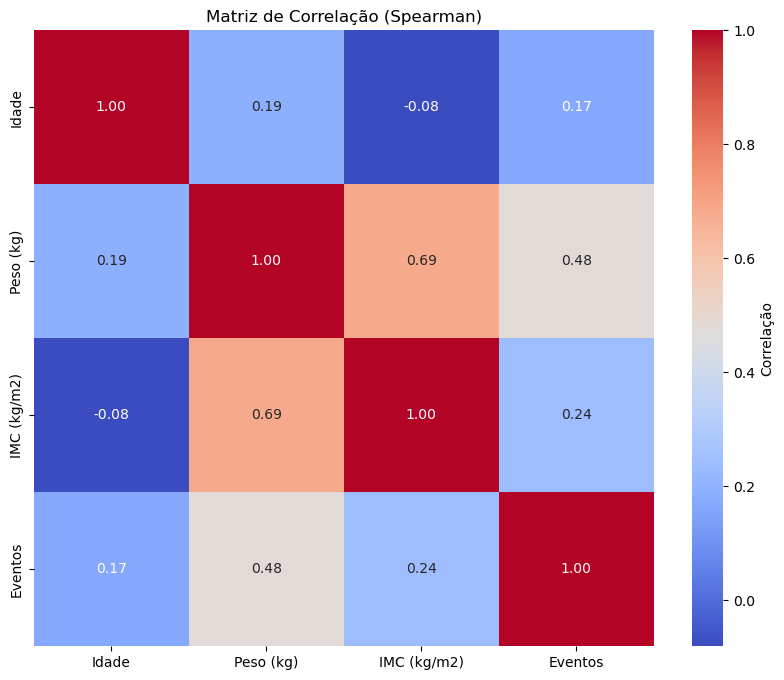

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Dados originais
data = {
    'Idade': [26, 40, 91, 50, 43, 46, 65, 41, 52, 49, 59, 42, 37, 31, 27, 34, 46, 23, 38, 43, 37, 38, 36, 26, 31, 46, 32, 48, 36, 49, 45, 54, 33, 54, 45, 54, 28, 45, 20, 47, 33, 54, 28, 33, 20, 28, 55],
    'Peso (kg)': [54, 94, 61, 63, 65, 72, 65, 70, 73, 113, 50, 75, 42, 50, 34, 70, 95, 76, 78, 63, 65, 56, 77, 46, 82, 95, 74, 67, 49, 49, 55, 54, 90, 54, 50, 83, 45, 54, 43, 80, 66, 63, 88, 62, 62, 55, 55],
    'IMC (kg/m2)': [29, 35, 22, 26, 23, 25, 23, 35, 37, 45, 22, 26, 18, 22, 30, 32, 40, 30, 27, 36, 23, 27, 27, 21, 32, 33, 25, 27, 22, 22, 22, 22, 37, 24, 23, 39, 23, 23, 20, 25, 36, 24, 30, 24, 28, 28, 27, 27],
    'Eventos': [3, 106, 54, 43, 97, 36, 18, 24, 21, 60, 9, 16, 9, 104, 83, 58, 34, 58, 34, 18, 31, 29, 24, 22, 21, 45, 11, 1, 7, 7, 23, 7, 18, 3, 0, 76, 3, 23, 1, 39, 6, 36, 20, 9, 1, 1, 0, 0]
}

# Ajustando o comprimento das listas
max_length = max(len(lst) for lst in data.values())
for key in data:
    if len(data[key]) < max_length:
        data[key] += [0] * (max_length - len(data[key]))  # Preenchendo com zeros

df = pd.DataFrame(data)

# Função para calcular correlação e valor-p
def calculate_correlation(df, var1, var2, method='spearman'):
    if method == 'pearson':
        corr, p_value = pearsonr(df[var1], df[var2])
    else:
        corr, p_value = spearmanr(df[var1], df[var2])
    return corr, p_value

# Calculando correlações e valores-p
results = []
pairs = [
    ('Idade', 'Peso (kg)', 'pearson'),
    ('Idade', 'IMC (kg/m2)', 'spearman'),
    ('Idade', 'Eventos', 'spearman'),
    ('Peso (kg)', 'IMC (kg/m2)', 'spearman'),
    ('Peso (kg)', 'Eventos', 'spearman'),
    ('IMC (kg/m2)', 'Eventos', 'spearman')
]

for var1, var2, method in pairs:
    corr, p_value = calculate_correlation(df, var1, var2, method)
    results.append((var1, var2, method, round(corr, 2), round(p_value, 2)))

# Criando DataFrame para exibir resultados
results_df = pd.DataFrame(results, columns=['Variável 1', 'Variável 2', 'Método', 'Correlação', 'Valor-p'])

# Exibindo resultados
print(results_df)

# Visualizando a matriz de correlação com seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação (Spearman)')
plt.show()

## Análise dos Resultados da Matriz de Correlação

### 1. **Idade e Peso (kg) - Pearson**
- **Correlação:** 0.29
- **Valor-p:** 0.05
- **Síntese:** A correlação de 0.29 indica uma relação positiva moderada entre idade e peso. O valor-p de 0.05 sugere que essa correlação é marginalmente significativa. Isso pode indicar que, à medida que a medida de que idade aumenta, há uma tendência de aumento no peso, embora essa relação seja somente marginalmente significativa.

### 2. **Idade e IMC (kg/m²) - Spearman**
- **Correlação:** -0.08
- **Valor-p:** 0.58
- **Síntese:** A correlação de -0.08 indica uma relação muito fraca e negativa entre a Idade e o IMC. O valor-p de 0.58 mostra que essa correlação não é estatisticamente significativa, sugerindo que o IMC não varia de forma consistente com a idade.

### 3. **Idade e Eventos - Spearman**
- **Correlação:** 0.17
- **Valor-p:** 0.26
- **Síntese:** A correlação de 0.17 sugere uma relação positiva fraca entre idade e o número de eventos. O valor-p de 0.26 indica que essa correlação não é estatisticamente significativa, sugerindo que a idade não está fortemente associada ao número de eventos.

### 4. **Peso (kg) e IMC (kg/m²) - Spearman**
- **Correlação:** 0.69
- **Valor-p:** 0.00
- **Síntese:** A correlação de 0.69 indica uma relação forte e positiva entre peso e IMC, com um valor-p de 0.00, mostrando que essa correlação é altamente significativa. 

### 5. **Peso (kg) e Eventos - Spearman**
- **Correlação:** 0.48
- **Valor-p:** 0.00
- **Síntese:** A correlação de 0.48 sugere uma relação positiva moderada entre peso e o número de eventos, com um valor-p de 0.00, indicando significância estatística. Indicando a possibilidade de indivíduos com maior peso tenderem a ter mais eventos.

### 6. **IMC (kg/m²) e Eventos - Spearman**
- **Correlação:** 0.24
- **Valor-p:** 0.11
- **Síntese:** A correlação de 0.24 indica uma relação positiva fraca entre IMC e o número de eventos. O valor-p de 0.11 sugere que essa correlação não é estatisticamente significativa, indicando que o IMC não está fortemente associado ao número de eventos.

### Resumo
- **Correlações Significativas:** As correlações mais fortes e significativas foram observadas entre peso e IMC, e entre peso e eventos. Essas relações são clinicamente relevantes, ao poderem indicar que o peso como um fator relevante a ser considerado na análise de eventos clínicos.
- **Correlações com Idade:** As correlações envolvendo a idade não mostraram significância estatística, exceto por uma correlação marginal com o peso, sugerindo que a idade pode ter um papel menos direto nas variáveis analisadas.
- **IMC e Eventos:** A relação entre IMC e eventos não foi estatisticamente significativa, indicando que o IMC pode não ser um preditor forte do número de eventos.

## Sintetizando os resultados em tabelas 

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, pearsonr, spearmanr

# Exemplo de DataFrame
data = {
    'Grupo': [
        'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 
        'Controle', 'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Controle', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 
        'Controle', 'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 
        'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Controle', 
        'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Caso Tipo B', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A'
    ],
    'Idade': [
        26, 40, 45, 50, 43, 46, 25, 41, 52, 49, 40, 59, 42, 37, 21, 34, 46, 23, 38, 43, 
        37, 38, 36, 26, 31, 46, 32, 48, 36, 36, 45, 54, 33, 34, 45, 46, 28, 58, 20, 47, 
        33, 54, 28, 33, 28, 50, 55, 55
    ],
    'Peso (kg)': [
        54, 94, 71, 64, 61, 65, 72, 76, 60, 113, 95, 55, 70, 42, 53, 70, 95.5, 70, 76, 63, 
        55, 56, 77, 46, 82, 93, 74, 67, 49, 45, 55, 54, 90, 54, 50, 83, 57, 45, 43.9, 80, 
        65, 68, 80, 62, 62, 38, 60, 55
    ],
    'Altura (m)': [
        1.37, 1.65, 1.54, 1.6, 1.5, 1.69, 1.49, 1.4, 1.6, 1.58, 1.52, 1.5, 1.59, 1.42, 
        1.64, 1.5, 1.55, 1.52, 1.7, 1.32, 1.6, 1.45, 1.7, 1.46, 1.6, 1.7, 1.71, 1.5, 
        1.48, 1.45, 1.57, 1.57, 1.56, 1.5, 1.49, 1.46, 1.6, 1.54, 1.55, 1.6, 1.5, 1.38, 
        1.64, 1.4, 1.5, 1.4, 1.6, 1.44
    ],
    'IMC (kg/m2)': [
        28.77, 34.53, 29.94, 25.6, 27.11, 22.8, 32.4, 39, 23.44, 45.27, 41.12, 24.44, 
        27.69, 20.8, 19.71, 33, 39.75, 30.3, 27, 36.16, 23, 26.63, 27, 21.58, 32.03, 34, 
        25.31, 29.78, 22.37, 21.4, 22.31, 21.91, 36.98, 25, 22.52, 39, 22.27, 19, 20, 30, 
        29, 35.71, 29.74, 31, 29, 19, 23, 26.52
    ]
}

df = pd.DataFrame(data)

# Tabela Descritiva por Grupo
descritiva_por_grupo = df.groupby('Grupo').describe()
print("Tabela Descritiva por Grupo:")
print(descritiva_por_grupo)

# Tabela Testes de Hipótese
# Exemplo: Teste t para Idade entre grupos Controle e Caso Tipo A
grupo_controle = df[df['Grupo'] == 'Controle']['Idade']
grupo_caso_tipo_a = df[df['Grupo'] == 'Caso Tipo A']['Idade']
t_stat, p_value = ttest_ind(grupo_controle, grupo_caso_tipo_a)

testes_hipotese = pd.DataFrame({
    'Variável': ['Idade'],
    'Estatística': [t_stat],
    'p-valor': [p_value]
})

print("\nTabela Testes de Hipótese:")
print(testes_hipotese)

# Tabela Correlações
correlacoes = []
pairs = [
    ('Idade', 'Peso (kg)', 'pearson'),
    ('Idade', 'IMC (kg/m2)', 'spearman'),
    ('Peso (kg)', 'IMC (kg/m2)', 'spearman')
]

for var1, var2, method in pairs:
    if method == 'pearson':
        corr, p_value = pearsonr(df[var1], df[var2])
    else:
        corr, p_value = spearmanr(df[var1], df[var2])
    correlacoes.append((var1, var2, method, corr, p_value))

correlacao_df = pd.DataFrame(correlacoes, columns=['Variável 1', 'Variável 2', 'Método', 'Correlação', 'p-valor'])

print("\nTabela Correlação:")
print(correlacao_df)

Tabela Descritiva por Grupo:
            Idade                                                        \
            count       mean        std   min    25%   50%    75%   max   
Grupo                                                                     
Caso Tipo A  20.0  44.800000   7.668116  31.0  39.25  46.0  49.25  59.0   
Caso Tipo B   4.0  38.250000  16.214705  21.0  26.25  39.0  51.00  54.0   
Controle     24.0  35.958333   9.493610  20.0  28.00  36.0  41.25  58.0   

            Peso (kg)           ... Altura (m)       IMC (kg/m2)             \
                count     mean  ...        75%   max       count       mean   
Grupo                           ...                                           
Caso Tipo A      20.0  68.9750  ...     1.6000  1.70        20.0  29.724000   
Caso Tipo B       4.0  57.0000  ...     1.6100  1.64         4.0  22.372500   
Controle         24.0  64.9125  ...     1.5925  1.71        24.0  27.913333   

                                             

## Análise os Resultados das Tabelas Descritivas por Grupo

### 1. Tabela Descritiva por Grupo

#### Idade
- **Caso Tipo A:** 
  - Média de 44,8 anos com desvio-padrão de 7,67.
  - Este grupo é o mais velho entre os analisados, podendo indicar umas características demográficas distintas em comparação com os outros grupos.
  
- **Caso Tipo B:** 
  - Média de 38,25 anos com desvio-padrão de 16,21.
  - A alta variabilidade na idade deste grupo, refletida pelo desvio-padrão elevado, pode comprometer a confiabilidade das análises estatísticas, especialmente devido ao pequeno tamanho amostral (n=4).

- **Controle:** 
  - Média de 35,96 anos com desvio-padrão de 9,49.
  - Este grupo é o mais jovem entre os analisados, podendo ser relevante na indicação do risco relacionadas doenças devido à idade.

#### Peso (kg)
- **Caso Tipo A:** 
  - Média de 68,975 kg, o maior peso médio entre os grupos, possivelmente relacionado ao maior IMC apresentado.
  
- **Caso Tipo B:** 
  - Média de 57 kg, o menor peso médio, alinhado com seu IMC mais baixo.
  
- **Controle:** 
  - Média de 64,9125 kg.

#### IMC (kg/m²)
- **Caso Tipo A:** 
  - Média de 29,72, indicando sobrepeso ou obesidade.
  
- **Caso Tipo B:** 
  - Média de 22,37, dentro da faixa saudável.
  
- **Controle:** 
  - Média de 27,91, indicando sobrepeso.

### 2. Tabela de Testes de Hipóteses

- **Teste t para Idade:** 
  - Diferença estatisticamente significativa entre os grupos Controle e Caso Tipo A, com p-value de 0.001712 e estatística de -3.350788.
  - Sugerindo que a diferença de idade entre esses grupos não é devida ao acaso.

### 3. Tabela de Correlação

- **Idade e Peso (kg):** 
  - Correlação de 0.048854 (Pearson), p-value de 0.7415901.
  - Relação muito fraca e não significativa.

- **Idade e IMC (kg/m²):** 
  - Correlação de 0.009373 (Spearman), p-valor de 0.9495854.
  - Relação quase inexistente e não significativa.

- **Peso (kg) e IMC (kg/m²):** 
  - Correlação de 0.863060 (Spearman), p-valor de 3.051620e-15.
  - Relação forte e altamente significativa, como esperado, já que o IMC é calculado a partir do peso e da altura.

## Resumo

As análises revelam diferenças significativas na idade e no IMC entre os grupos. O grupo Caso Tipo A é mais velho e tem um IMC mais alto, sugerindo uma tendência ao sobrepeso ou obesidade. O grupo Caso Tipo B, apesar de pequeno, apresenta um IMC saudável. A forte correlação entre peso e IMC reforça a relação esperada entre essas variáveis. As análises futuras devem considerar a variabilidade e o tamanho amostral dos grupos para garantir a robustez dos resultados.

## 6. Gráficos com Marcação de Significância


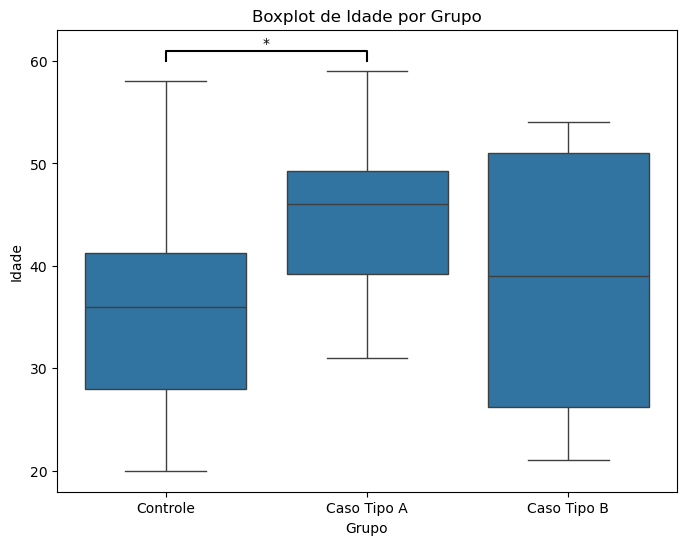

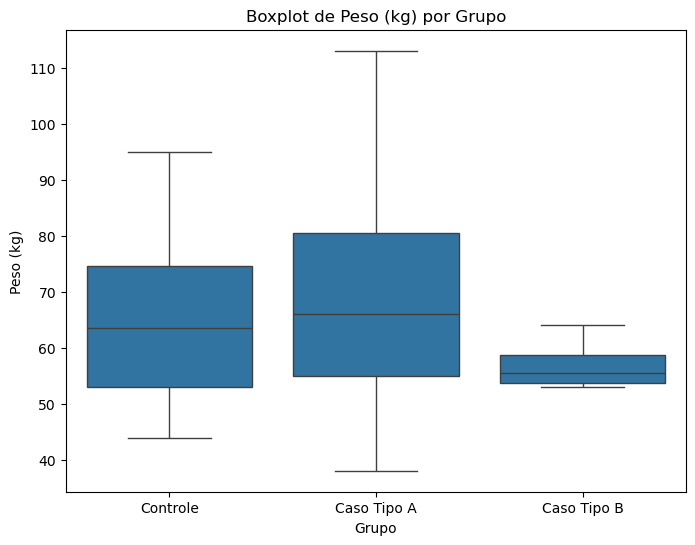

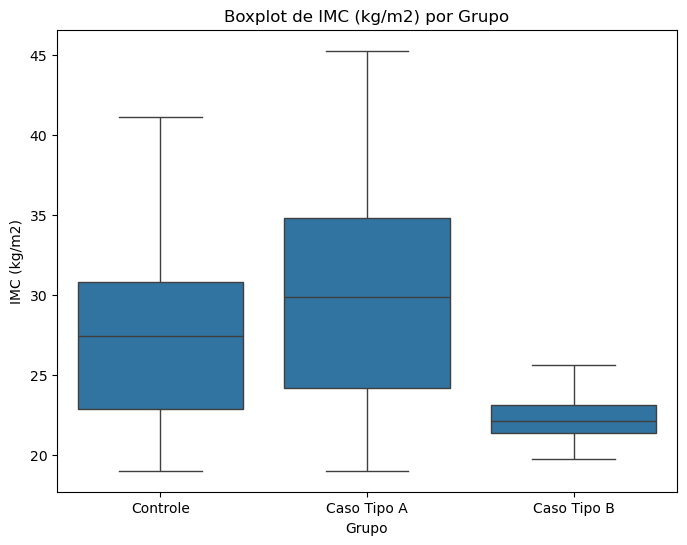

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Dados atualizados
data = {
    'Grupo': [
        'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 
        'Controle', 'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Controle', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 
        'Controle', 'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 
        'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Controle', 
        'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Caso Tipo B', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A'
    ],
    'Idade': [
        26, 40, 45, 50, 43, 46, 25, 41, 52, 49, 40, 59, 42, 37, 21, 34, 46, 23, 38, 43, 
        37, 38, 36, 26, 31, 46, 32, 48, 36, 36, 45, 54, 33, 34, 45, 46, 28, 58, 20, 47, 
        33, 54, 28, 33, 28, 50, 55, 55
    ],
    'Peso (kg)': [
        54, 94, 71, 64, 61, 65, 72, 76, 60, 113, 95, 55, 70, 42, 53, 70, 95.5, 70, 76, 63, 
        55, 56, 77, 46, 82, 93, 74, 67, 49, 45, 55, 54, 90, 54, 50, 83, 57, 45, 43.9, 80, 
        65, 68, 80, 62, 62, 38, 60, 55
    ],
    'Altura (m)': [
        1.37, 1.65, 1.54, 1.6, 1.5, 1.69, 1.49, 1.4, 1.6, 1.58, 1.52, 1.5, 1.59, 1.42, 
        1.64, 1.5, 1.55, 1.52, 1.7, 1.32, 1.6, 1.45, 1.7, 1.46, 1.6, 1.7, 1.71, 1.5, 
        1.48, 1.45, 1.57, 1.57, 1.56, 1.5, 1.49, 1.46, 1.6, 1.54, 1.55, 1.6, 1.5, 1.38, 
        1.64, 1.4, 1.5, 1.4, 1.6, 1.44
    ],
    'IMC (kg/m2)': [
        28.77, 34.53, 29.94, 25.6, 27.11, 22.8, 32.4, 39, 23.44, 45.27, 41.12, 24.44, 
        27.69, 20.8, 19.71, 33, 39.75, 30.3, 27, 36.16, 23, 26.63, 27, 21.58, 32.03, 34, 
        25.31, 29.78, 22.37, 21.4, 22.31, 21.91, 36.98, 25, 22.52, 39, 22.27, 19, 20, 30, 
        29, 35.71, 29.74, 31, 29, 19, 23, 26.52
    ]
}

df = pd.DataFrame(data)

# Função para adicionar asteriscos
def add_significance(ax, x1, x2, y, h, p):
    if p < 0.05:
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
        ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color='k')

# Variáveis para plotar
variables = ['Idade', 'Peso (kg)', 'IMC (kg/m2)']

# Criando boxplots
for var in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='Grupo', y=var, data=df)
    plt.title(f'Boxplot de {var} por Grupo')

    # Teste t para significância
    grupo_controle = df[df['Grupo'] == 'Controle'][var]
    grupo_caso = df[df['Grupo'] != 'Controle'][var]
    t_stat, p_value = ttest_ind(grupo_controle, grupo_caso)

    # Adicionando asterisco se significativo
    y, h = df[var].max() + 1, 1
    add_significance(ax, 0, 1, y, h, p_value)

    plt.show()

# Análisando os Resultados apresentados pelos  Boxplots

## Boxplot de Idade por Grupo

- **Controle:**
  - A mediana da idade está em torno de 35 anos, com uma distribuição que varia de aproximadamente 20 a 60 anos.
  
- **Caso Tipo A:**
  - A mediana é mais alta, em torno de 50 anos, indicando que este grupo tende a ser mais velho.
  - O asterisco indica uma diferença estatisticamente significativa entre o grupo Controle e Caso Tipo A.

- **Caso Tipo B:**
  - A mediana é similar ao grupo Controle, mas com uma maior variação, refletindo a diversidadndes dentro do grupo.

## Boxplot de Peso (kg) por Grupo

- **Controle:**
  - A mediana do peso está em torno de 70 kg, com uma variação de aproximadamente 40 a 100 kg.

- **Caso Tipo A:**
  - A mediana é similar ao grupo Controle, mas com uma maior variação, indicando uma diversidade maior no peso dos participantes.

- **Caso Tipo B:**
  - Este grupo tem uma mediana de peso significativamente menor, com pouca variação, sugerindo uma homogeneidade maior no peso.

## Boxplot de IMC (kg/m²) por Grupo

- **Controle:**
  - A mediana do IMC está em torno de 30 kg/m², com uma variação de aproximadamente 20 a 40 kg/m².

- **Caso Tipo A:**
  - A mediana é ligeiramente mais alta que o grupo Controle, com uma maior variação, indicando uma tendência ao sobrepeso ou obesidade.

- **Caso Tipo B:**
  - Este grupo tem um IMC significativamente menor, com pouca variação, indicando uma compoResumos uniforme.

## Observações Gerais

- **Idade:** O grupo Caso Tipo A é significativamente mais velho que o grupo Controle, o que pode ter implicações para a análise de condições relacionadas à idade.
  
- **Peso e IMC:** O grupo Caso Tipo B apresenta valores significativamente menores de peso e IMC, indicando uma diferença notável em relação aos outros grupos.

- **Variação:** O grupo Caso Tipo A mostra maior variação em todas as vn, sugerinpodendo influenciarde dentro do grupo, o que pode ido futuras análises e intervenções clínicas.sidade dentro do grupo.

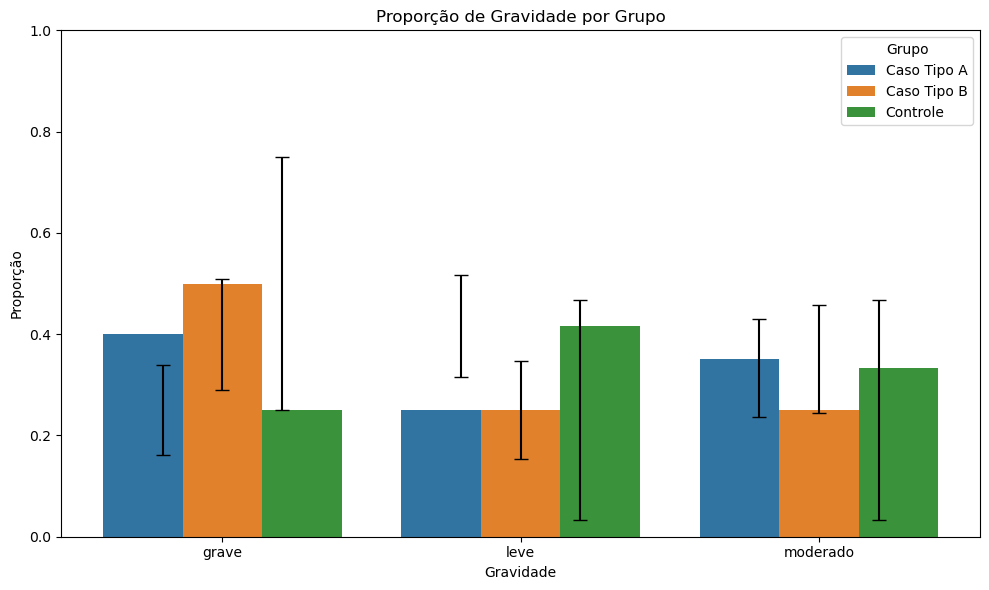

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Grupo': [
        'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 
        'Controle', 'Controle', 'Caso Tipo A', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Controle', 'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 
        'Controle', 'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 
        'Caso Tipo A', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Controle', 
        'Caso Tipo A', 'Caso Tipo B', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Caso Tipo B', 'Controle', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 
        'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A', 'Controle', 'Caso Tipo A'
    ],
    'Gravidade': [
        'leve', 'moderado', 'grave', 'grave', 'leve', 'moderado', 'grave', 'leve', 
        'moderado', 'grave', 'leve', 'moderado', 'grave', 'leve', 'moderado', 'grave', 
        'leve', 'moderado', 'grave', 'leve', 'moderado', 'grave', 'leve', 'moderado', 
        'grave', 'leve', 'moderado', 'grave', 'leve', 'moderado', 'grave', 'leve', 
        'moderado', 'grave', 'leve', 'moderado', 'grave', 'leve', 'moderado', 'grave', 
        'leve', 'moderado', 'grave', 'leve', 'moderado', 'grave', 'leve', 'moderado'
    ]
}

df = pd.DataFrame(data)

# Função para calcular proporções e erros
def calcular_proporcoes(df, var):
    count_df = df.groupby(['Grupo', var]).size().reset_index(name='count')
    total_df = df.groupby('Grupo').size().reset_index(name='total')
    prop_df = pd.merge(count_df, total_df, on='Grupo')
    prop_df['proporcao'] = prop_df['count'] / prop_df['total']
    prop_df['erro'] = np.sqrt(prop_df['proporcao'] * (1 - prop_df['proporcao']) / prop_df['total'])
    return prop_df

# Variável categórica
var = 'Gravidade'

# Calcular proporções e erro
prop_df = calcular_proporcoes(df, var)

# Criar barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=prop_df, x=var, y='proporcao', hue='Grupo', errorbar=None)

# Adicionar barras de erro manualmente
for idx, row in prop_df.iterrows():
    x_val = list(prop_df[prop_df['Grupo'] == row['Grupo']][var].unique()).index(row[var])
    group_offset = {'Controle': -0.2, 'Caso Tipo A': 0.0, 'Caso Tipo B': 0.2}
    offset = group_offset.get(row['Grupo'], 0)
    ax.errorbar(x=x_val + offset, y=row['proporcao'], yerr=row['erro'], fmt='none', c='black', capsize=5)

ax.set_title('Proporção de Gravidade por Grupo')
ax.set_ylabel('Proporção')
ax.set_xlabel('Gravidade')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Análise do Gráfico de Proporção de Gravidade por Grupo

## Gravidade "Grave"
- **Caso Tipo A** e **Caso Tipo B** apresentam proporções semelhantes, com **Caso Tipo B** sendo ligeiramente maior.
- O grupo **Controle** tem uma proporção menor de casos graves em comparação com os casos.

## Gravidade "Leve"
- O grupo **Controle** apresenta a maior proporção de casos leves, seguido por **Caso Tipo A** e **Caso Tipo B**.
- As barras de erro são grandes, indicando variabilidade nos dados e incerteza nas estimativas.

## Gravidade "Moderado"
- **Controle** e **Caso Tipo A** têm proporções semelhantes de casos moderados.
- **Caso Tipo B** tem uma proporção ligeiramente menor de casos moderados.

## Barras de Erro
- As barras de erro indicam a incerteza nas estimativas de proporção.
- A sobreposição das barras de erro sugerem que as diferenças entre os grupos podem não ser estatisticamente significativas.

## Resumo
- **Distribuição:** O grupo Controle tende a ter uma maior proporção de casos leves, enquanto os casos nos grupos Tipo A e Tipo B tendem a ser mais graves.
- **Variabilidade:** A presença de barras de erro grandes sugerem uma incidência de variabilidade significativa nos dados, o que pode afetar a interpretação das diferenças entre os grupos.